In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%cd ../..

/scratch/km817/iREC


In [4]:
import torch
import torch.distributions as dist
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from rec.utils import kl_estimate_with_mc, plot_running_sum_2d, plot_2d_distribution, kl_estimate_with_mc, compute_variational_posterior
from tqdm.notebook import trange
#import seaborn as sns; sns.set(); sns.set_style('whitegrid')
import math
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
plt.rcParams.update({'font.weight': 'normal'})
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'lines.linewidth' : 2})

In [6]:
torch.set_default_tensor_type(torch.DoubleTensor)

In [7]:
from rec.beamsearch.Coders.Encoder_Variational import Encoder
from rec.beamsearch.distributions.CodingSampler import CodingSampler
from rec.beamsearch.distributions.VariationalPosterior import VariationalPosterior
from rec.beamsearch.samplers.GreedySampling import GreedySampler
from rec.OptimisingVars.VariationalOptimiser import VariationalOptimiser

In [8]:
torch.manual_seed(100)

qs = []
ps = []
dims = [1, 5, 10, 25, 50, 75, 100]
for d in dims:
    rand_mat = torch.rand(size=(d,d))
    qs.append(dist.MultivariateNormal(loc= torch.ones(size=(d,)), covariance_matrix = torch.eye(d)))
    ps.append(dist.MultivariateNormal(loc=torch.zeros((d,)), covariance_matrix = torch.eye(d)))

In [9]:
from rec.beamsearch.Coders.Encoder_Variational import Encoder
from rec.beamsearch.distributions.CodingSampler import CodingSampler
from rec.beamsearch.distributions.VariationalPosterior import VariationalPosterior
from rec.beamsearch.samplers.GreedySampling import GreedySampler
from rec.OptimisingVars.VariationalOptimiser import VariationalOptimiser

In [10]:
coding_sampler = CodingSampler
auxiliary_posterior = VariationalPosterior
selection_sampler = GreedySampler

In [11]:
omega = 5
initial_seed = 0
beamwidth = 1
epsilon = 0.
initial_seed = initial_seed
var_times = []
for q in qs:

    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1.)
    
    #enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    var_time = %timeit -o enc.run_encoder()
    var_times.append(var_time)

/scratch/km817/miniconda3/envs/Torch/lib/python3.8/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


798 µs ± 381 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
853 µs ± 292 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
893 µs ± 332 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.79 ms ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
21.1 ms ± 321 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
85.1 ms ± 617 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
163 ms ± 716 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
from rec.beamsearch.Coders.Encoder import Encoder
from rec.beamsearch.distributions.CodingSampler import CodingSampler
from rec.beamsearch.distributions.EmpiricalMixturePosterior import EmpiricalMixturePosterior
from rec.beamsearch.samplers.GreedySampling import GreedySampler

In [13]:
coding_sampler = CodingSampler
auxiliary_posterior = EmpiricalMixturePosterior
selection_sampler = GreedySampler

In [ ]:
omega = 5
initial_seed = 0
beamwidth = 1
epsilon = 0.
alpha = 1.
initial_seed = initial_seed
emp_times_1 = []
for q in qs:
    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 n_samples_from_target=1,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1.)

        #enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    emp_time = %timeit -o enc.run_encoder()
    emp_times_1.append(emp_time)

800 µs ± 569 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
854 µs ± 195 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
892 µs ± 361 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
omega = 5
initial_seed = 0
beamwidth = 1
epsilon = 0.
alpha = 1.
initial_seed = initial_seed
emp_times_10 = []
for q in qs:
    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 n_samples_from_target=10,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1.)

        #enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    emp_time = %timeit -o enc.run_encoder()
    emp_times_10.append(emp_time)

In [16]:
omega = 5
initial_seed = 0
beamwidth = 1
epsilon = 0.
alpha = 1.
initial_seed = initial_seed
emp_times_100 = []
for q in qs:
    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 n_samples_from_target=100,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1.)

        #enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    emp_time = %timeit -o enc.run_encoder()
    emp_times_100.append(emp_time)

5.17 s ± 15.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
omega = 5
initial_seed = 0
beamwidth = 1
epsilon = 0.
alpha = 1.
initial_seed = initial_seed
emp_times_1000 = []
for q in qs:
    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 n_samples_from_target=1000,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1.)

        #enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    emp_time = %timeit -o enc.run_encoder()
    emp_times_1000.append(emp_time)

802 µs ± 236 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
860 µs ± 3.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
894 µs ± 499 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
375 ms ± 5.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.48 s ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
19.4 s ± 22.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
50.6 s ± 721 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
for q, p in zip(qs, ps):
    print(dist.kl_divergence(q, p))

tensor(0.5000)
tensor(2.5000)
tensor(5.)
tensor(12.5000)
tensor(25.)
tensor(37.5000)
tensor(50.)


In [19]:
var_mean_times = [t.average for t in var_times]
emp_1_mean_times = [t.average for t in emp_times_1]
emp_10_mean_times = [t.average for t in emp_times_10]
emp_100_mean_times = [t.average for t in emp_times_100]
emp_1000_mean_times = [t.average for t in emp_times_1000]

emp_all_times = [emp_1_mean_times, emp_10_mean_times, emp_100_mean_times, emp_1000_mean_times]

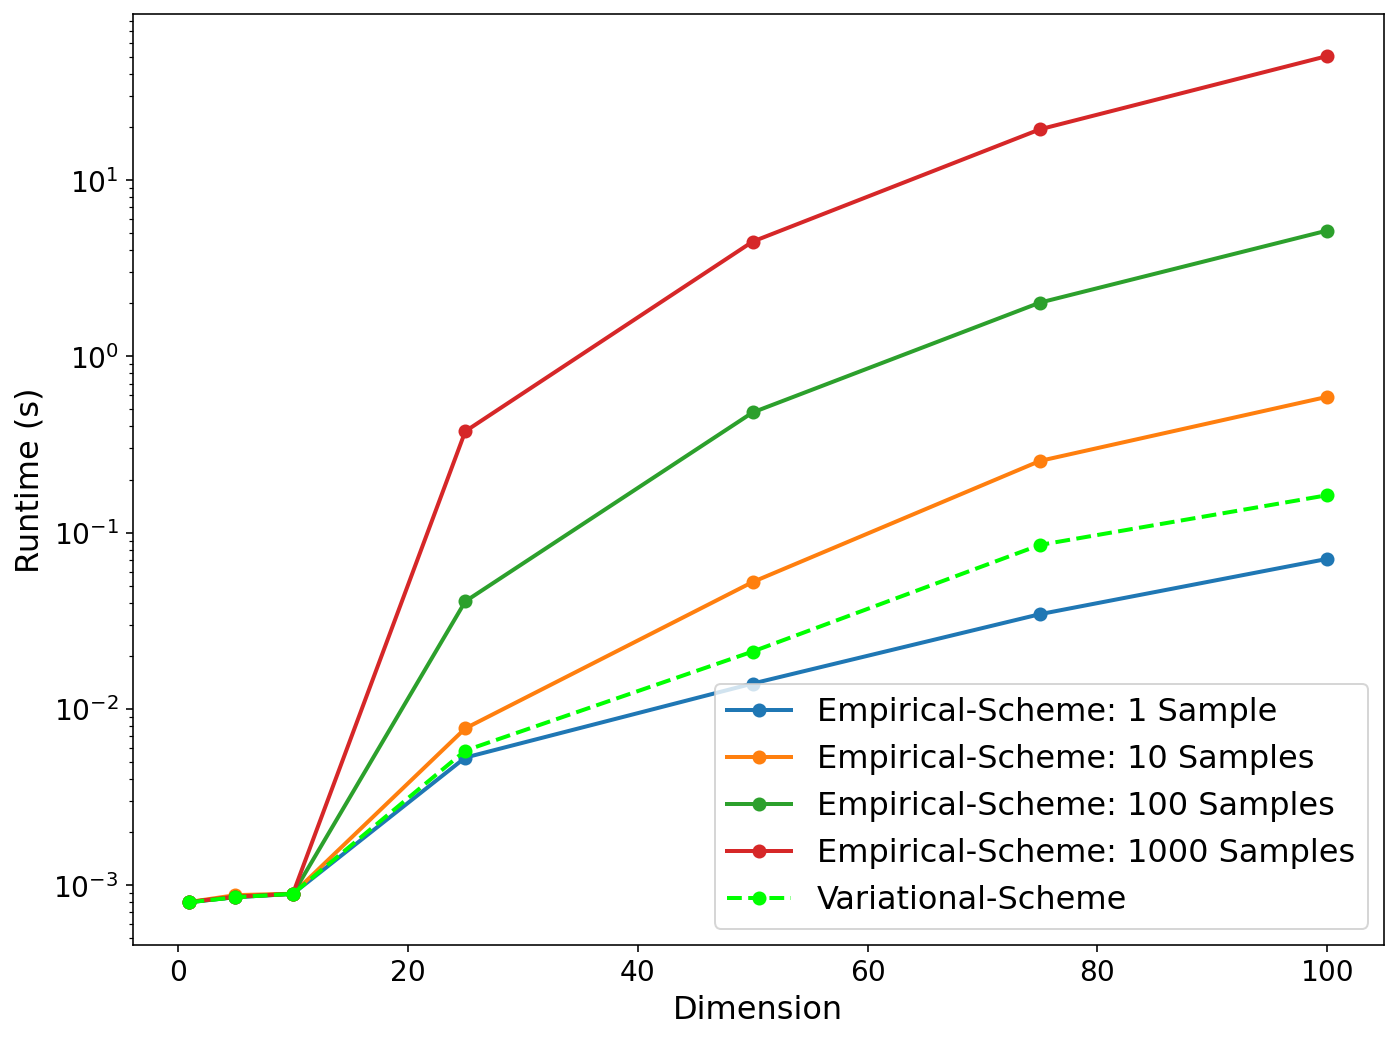

In [23]:
f, ax = plt.subplots(figsize=(10, 7.5))
fs = 16
for times in emp_all_times:
    ax.plot(dims, times, 'o-')
    ax.set_yscale('log')
ax.plot(dims, var_mean_times, 'o--', color='lime')
ax.set_xlabel('Dimension', fontsize=fs)
ax.set_ylabel('Runtime (s)', fontsize=fs)
ax.tick_params(axis='both', which='major', labelsize=fs-2)
ax.tick_params(axis='both', which='minor', labelsize=fs-2)
ax.legend(['Empirical-Scheme: 1 Sample', 'Empirical-Scheme: 10 Samples', 'Empirical-Scheme: 100 Samples', 'Empirical-Scheme: 1000 Samples', 'Variational-Scheme'], fontsize=fs)
f.tight_layout()
f.savefig("Figures/Thesis/Var_vs_Emp_runtimes.pdf", bbox_inches='tight')

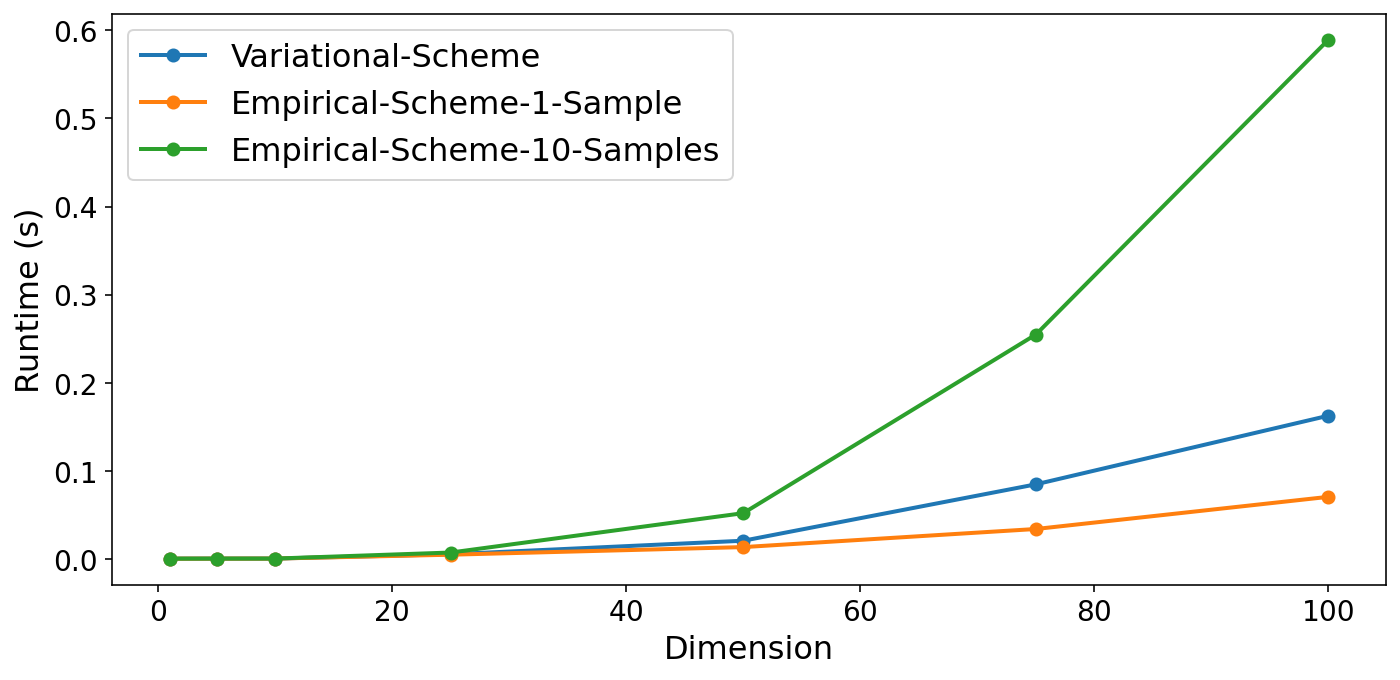

In [21]:
f, ax = plt.subplots(figsize=(10, 5))
ax.plot(dims, var_mean_times, 'o-')
ax.plot(dims, emp_1_mean_times, 'o-')
ax.plot(dims, emp_10_mean_times, 'o-')
ax.legend(['Variational-Scheme', 'Empirical-Scheme-1-Sample', 'Empirical-Scheme-10-Samples'], fontsize=fs)
ax.tick_params(axis='both', which='major', labelsize=fs-2)
ax.tick_params(axis='both', which='minor', labelsize=fs-2)
ax.set_xlabel('Dimension', fontsize=fs)
ax.set_ylabel('Runtime (s)', fontsize=fs)
f.tight_layout()

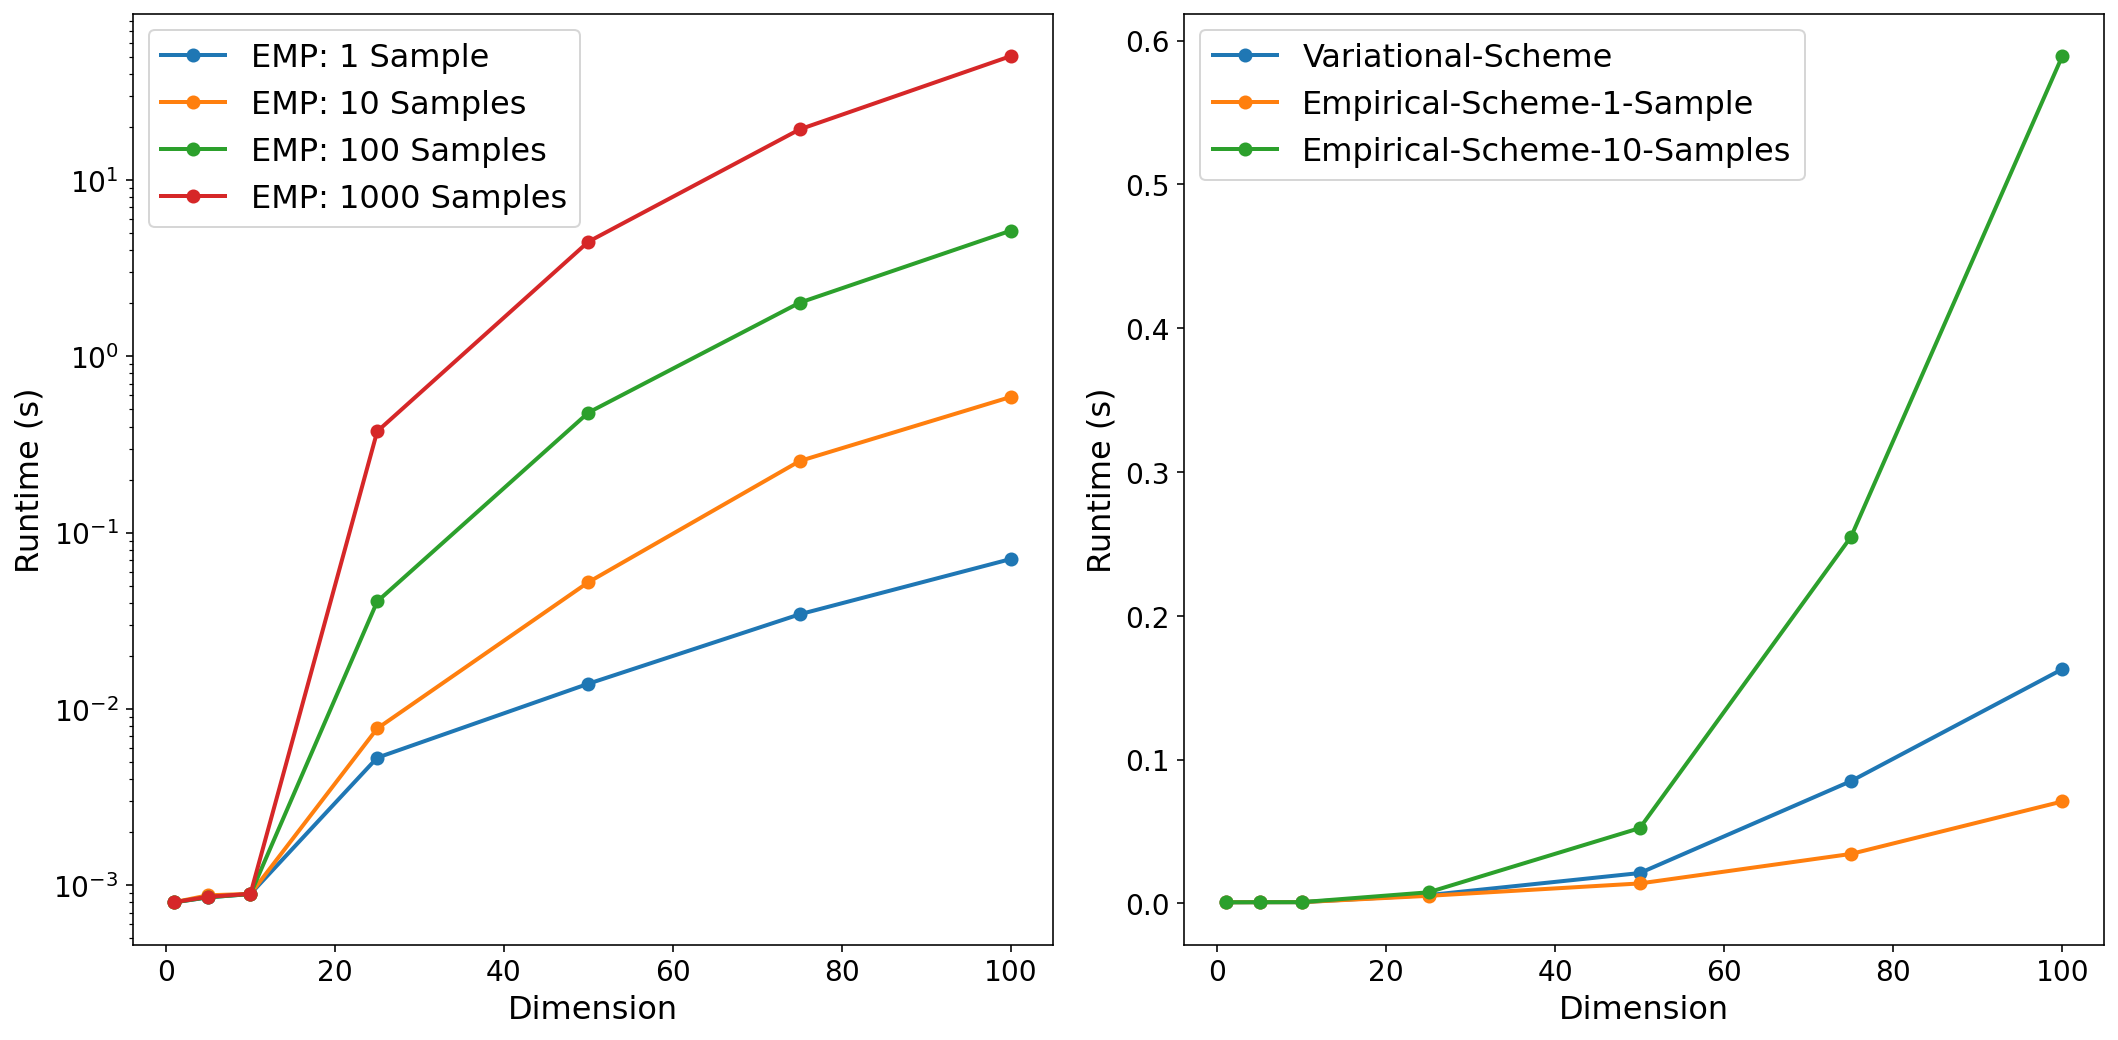

In [22]:
f, [ax1, ax2] = plt.subplots(1, 2,figsize=(15, 7.5))
fs = 16
for times in emp_all_times:
    ax1.plot(dims, times, 'o-')
    ax1.set_yscale('log')
ax1.set_xlabel('Dimension', fontsize=fs)
ax1.set_ylabel('Runtime (s)', fontsize=fs)
ax1.tick_params(axis='both', which='major', labelsize=fs-2)
ax1.tick_params(axis='both', which='minor', labelsize=fs-2)
ax1.legend(['EMP: 1 Sample', 'EMP: 10 Samples', 'EMP: 100 Samples', 'EMP: 1000 Samples'], fontsize=fs)
ax2.plot(dims, var_mean_times, 'o-')
ax2.plot(dims, emp_1_mean_times, 'o-')
ax2.plot(dims, emp_10_mean_times, 'o-')
ax2.legend(['Variational-Scheme', 'Empirical-Scheme-1-Sample', 'Empirical-Scheme-10-Samples'], fontsize=fs)
ax2.tick_params(axis='both', which='major', labelsize=fs-2)
ax2.tick_params(axis='both', which='minor', labelsize=fs-2)
ax2.set_xlabel('Dimension', fontsize=fs)
ax2.set_ylabel('Runtime (s)', fontsize=fs)
f.tight_layout()